# MNIST - Picture Normalization



In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load dataset splitted in train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
# convert into keras compatible float32 type
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [10]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
# reshaping the data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

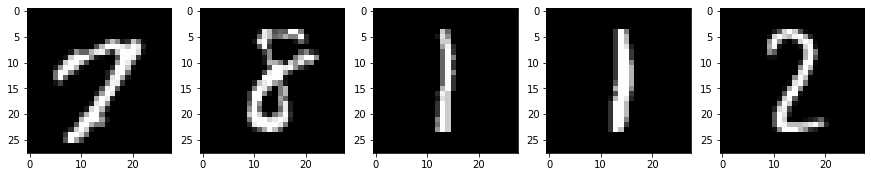

In [34]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
  n = np.random.randint(x_train.shape[0])
  axs[i].imshow(x_train[n, :, :, 0], cmap="gray")
plt.show()

# Normalization
Getting the pixel values from [0, 255] to [0, 1]

calculation: x(new) = x / max(x)

In [38]:
np.min(x_train), np.max(x_train)

(0.0, 255.0)

In [37]:
# normalized data
x_train_normalized = x_train / np.max(x_train)
x_test_normalized = x_test / np.max(x_test)

np.min(x_train_normalized), np.max(x_train_normalized)

(0.0, 1.0)

# Neural Net

In [39]:
# input shape
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

In [42]:
# input layer
net_input = Input(shape=input_shape)

# convolutional layers
x = Conv2D(filters=32, kernel_size=(4, 4), strides=2, padding="same")(net_input)
x = Activation("relu")(x)
x = Conv2D(filters=64, kernel_size=(2, 2), strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x) # POOLING
x = Conv2D(filters=64, kernel_size=(2, 2), strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x) # POOLING

# flatten
x = Flatten()(x)

# dense layer
x = Dense(128)(x)
x = Activation("relu")(x)

# output layer
x = Dense(10)(x)
net_output = Activation("softmax")(x)

# instantiate model
model = Model(inputs=net_input, outputs=net_output)

# compile model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(lr=0.001),
    metrics = ["accuracy"])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        544       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

## training with normal data

In [43]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2530 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0694 - accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0547 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9908
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.026

In [45]:
normal_acc = history.history['accuracy']

## training with normalized data

In [46]:
history = model.fit(
    x=x_train_normalized,
    y=y_train,
    epochs=10,
    batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2362 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0304 - accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [47]:
normalized_acc = history.history['accuracy']

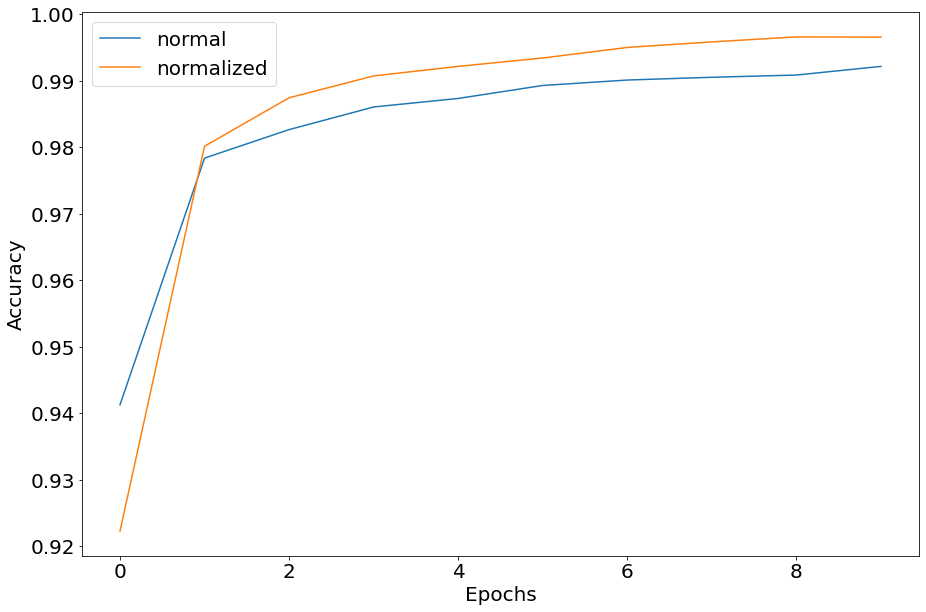

In [54]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

plt.figure(figsize=(15,10))
plt.plot(normal_acc, label="normal")
plt.plot(normalized_acc, label="normalized")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()